In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv('uber-raw-data-sep14.csv')

In [48]:
df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [49]:
df.tail(5)

,Date/Time,Lat,Lon,Base
114420,9/10/2014 22:16:00,40.7606,-73.9835,B02598
114421,9/10/2014 22:16:00,40.7486,-73.9919,B02598
114422,9/10/2014 22:16:00,40.7532,-73.9928,B02598
114423,9/10/2014 22:16:00,40.7741,-73.8726,B02598
114424,9/10/2014 22:16:00,40.0000,NaN,NaN


Data PreProcessing

In [50]:
df.shape

(114425, 4)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114425 entries, 0 to 114424
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  114425 non-null  object 
 1   Lat        114425 non-null  float64
 2   Lon        114424 non-null  float64
 3   Base       114424 non-null  object 
dtypes: float64(2), object(2)
memory usage: 3.5+ MB


In [52]:
df.describe()

,Lat,Lon
count,114425.000000,114424.000000
mean,40.740388,-73.972792
std,0.040793,0.063868
min,40.000000,-74.677200
25%,40.721900,-73.997425
50%,40.743300,-73.983700
75%,40.761800,-73.965400
max,41.224600,-72.905700


In [53]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          1
Base         1
dtype: int64

In [64]:
new_df=df.dropna()

In [65]:
new_df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [66]:
new_df.shape

(114424, 4)

In [67]:
new_df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

Feature Engineering

In [68]:
new_df['Date/Time'] = pd.to_datetime(new_df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
new_df['DayOfWeekNum'] = new_df['Date/Time'].dt.dayofweek
new_df['DayOfWeek'] = new_df['Date/Time'].dt.day_name()
new_df['MonthDayNum'] = new_df['Date/Time'].dt.day
new_df['HourOfDay'] = new_df['Date/Time'].dt.hour
new_df['MinOfDay'] = new_df['Date/Time'].dt.minute

<ipython-input-68-473013592b3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date/Time'] = pd.to_datetime(new_df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
<ipython-input-68-473013592b3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DayOfWeekNum'] = new_df['Date/Time'].dt.dayofweek
<ipython-input-68-473013592b3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

This line converts the Date/Time column from its current string format to Pandas datetime format (Timestamp). The format="%m/%d/%Y %H:%M:%S" parameter specifies the format of the datetime strings in your Date/Time column. In this case:
%m represents the month (01-12)
%d represents the day of the month (01-31)
%Y represents the year (4-digit)
%H represents the hour (00-23)
%M represents the minute (00-59)
%S represents the second (00-59)
This format string tells Pandas how to interpret the string representation of dates and times in your data.
new_df['Date/Time'].dt.dayofweek:

After converting Date/Time to datetime format, you can access various datetime properties using the .dt accessor.
.dt.dayofweek: Returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
new_df['Date/Time'].dt.day_name():

.dt.day_name(): Returns the name of the day of the week corresponding to each datetime value.
new_df['Date/Time'].dt.day:

.dt.day: Returns the day of the month (1-31).
new_df['Date/Time'].dt.hour:

.dt.hour: Returns the hour of the day (0-23).
new_df['Date/Time'].dt.minute:

.dt.minute: Returns the minute of the hour (0-59).
Summary:
The pd.to_datetime() function converts the Date/Time column from a string format to a datetime format using the specified format string.
After conversion, the .dt accessor allows you to extract various datetime components (dayofweek, day_name, day, hour, minute) from the Date/Time column and create new columns (DayOfWeekNum, DayOfWeek, MonthDayNum, HourOfDay, MinOfDay) in your DataFrame new_df.

In [69]:
new_df.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,MinOfDay
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday,1,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday,1,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday,1,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday,1,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday,1,0,11


In [70]:
weekday = new_df.pivot_table(index=['DayOfWeek'],values='Base',aggfunc='count')

In [71]:
weekday.head()

,Base
DayOfWeek,
Friday,15568
Monday,16666
Saturday,14963
Sunday,10660
Thursday,14552


In [72]:
weekdayAverage=weekday/30
weekdayAverage.head()

,Base
DayOfWeek,
Friday,518.933333
Monday,555.533333
Saturday,498.766667
Sunday,355.333333
Thursday,485.066667


Text(0.5, 1.0, 'Average Rides per Day vs Day of Week')

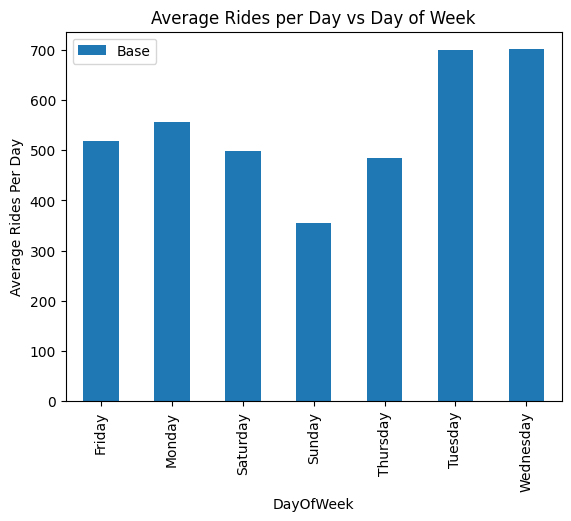

In [73]:
weekdayAverage.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.title('Average Rides per Day vs Day of Week')

In [74]:
hours = new_df.pivot_table(index=['HourOfDay'],values='Base',aggfunc='count')

Text(0.5, 1.0, 'Number of Rides vs Hour of Day')

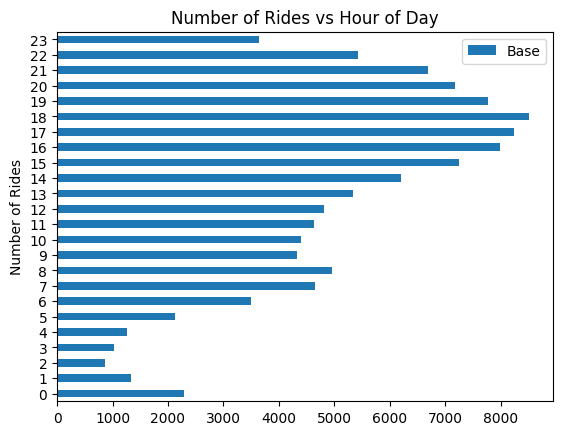

In [77]:
hours/30
hours.plot(kind='barh')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')

<Axes: ylabel='Frequency'>

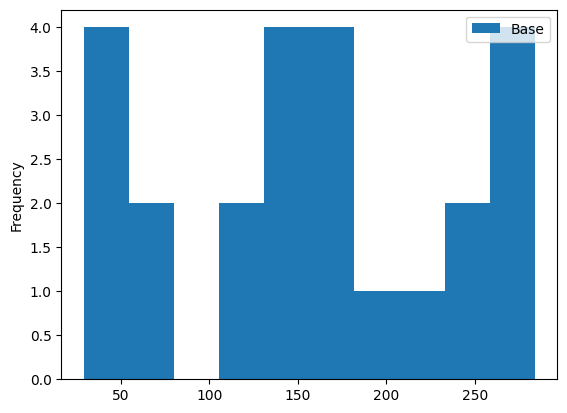

In [78]:
avgHours=hours/30
avgHours.plot(kind='hist')

<Axes: ylabel='Frequency'>

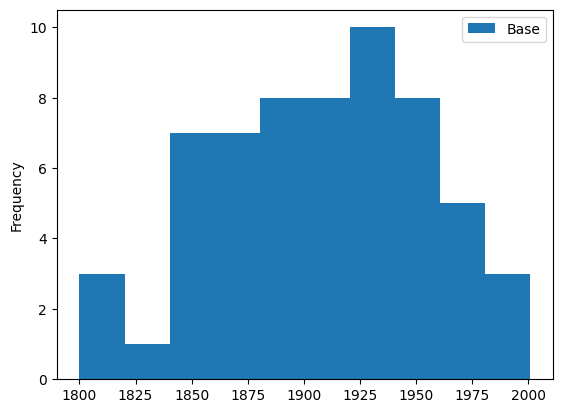

In [82]:
min = new_df.pivot_table(index=['MinOfDay'],values='Base',aggfunc='count')
min.plot(kind='hist')